In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as pgo
from plotly.subplots import make_subplots
import io
import base64
from wordcloud import WordCloud

In [468]:
job_Data = pd.read_csv(r'C:\Users\HITESH KOTIAN\OneDrive\Desktop\Project\DSjob_csv\Glassdoor_Salary_Cleaned_Version.csv')
job_Data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


<Axes: >

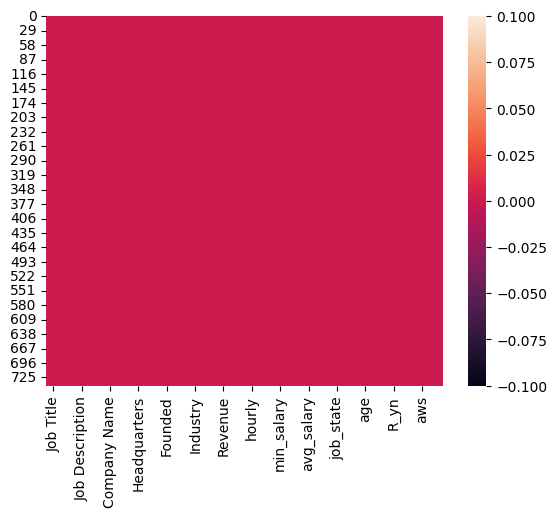

In [469]:
sn.heatmap(job_Data.isnull())

In [470]:
job_Data.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [471]:
job_Data.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
dtype: object

### Data Cleaning

In [472]:
job_Data['Salary Estimate'] = job_Data['Salary Estimate'].replace('[$K]','',regex= True)
job_Data[['Min_salary','Max_salary']] = job_Data['Salary Estimate'].str.extract(r'(\d+)k?-(\d+)').astype(float)
job_Data['company_txt'] = job_Data['company_txt'].str.replace('\n','')
job_Data['Company Name'] = job_Data['Company Name'].str.replace(r'\n\d+(.\d+)?','',regex= True)
job_Data['Industry'] = job_Data['Industry'].replace('-1', 'Unknown')
job_Data['Type of ownership'] = job_Data['Type of ownership'].replace('-1', 'Unknown')
job_Data['Founded'] = job_Data['Founded'].replace(-1, 'no info')

In [473]:
job_Data['Company Name'].head()

0                        Tecolote Research
1    University of Maryland Medical System
2                                  KnowBe4
3                                     PNNL
4                       Affinity Solutions
Name: Company Name, dtype: object

In [474]:
# There are too many columns here we need selective 
job_Data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'Min_salary', 'Max_salary'],
      dtype='object')

In [475]:
new_data = job_Data[['Job Title','Company Name', 'Location','Founded','Industry', 'Sector','Type of ownership',
       'hourly', 'Min_salary', 'Max_salary', 'avg_salary', 'job_state',  'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel']]
new_data.sample(5)

,Job Title,Company Name,Location,Founded,Industry,Sector,Type of ownership,hourly,Min_salary,Max_salary,avg_salary,job_state,age,python_yn,R_yn,spark,aws,excel
636,Senior Scientist - Biostatistician,Reynolds American,"Winston-Salem, NC",1875,Consumer Products Manufacturing,Manufacturing,Company - Private,0,65.0,96.0,80.5,NC,145,0,0,0,0,1
620,Geospatial Software Developer and Data Scientist,Applied Research Laboratories,"Austin, TX",no info,Colleges & Universities,Education,College / University,0,82.0,129.0,105.5,TX,-1,1,0,0,1,0
512,Data Engineer,NCSOFT,"Aliso Viejo, CA",1997,Video Games,Media,Company - Public,0,79.0,147.0,113.0,CA,23,1,0,1,1,1
503,"Associate Director, Platform and DevOps- Data ...",Takeda Pharmaceuticals,"Cambridge, MA",1781,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Company - Public,0,113.0,196.0,154.5,MA,239,0,0,1,1,1
270,"Sr. Scientist, Quantitative Translational Scie...",Takeda Pharmaceuticals,"Boston, MA",1781,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Company - Public,0,117.0,206.0,161.5,MA,239,0,0,0,0,0


## Analysis

C:\Users\HITESH KOTIAN\AppData\Local\Temp\ipykernel_13144\1790526859.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




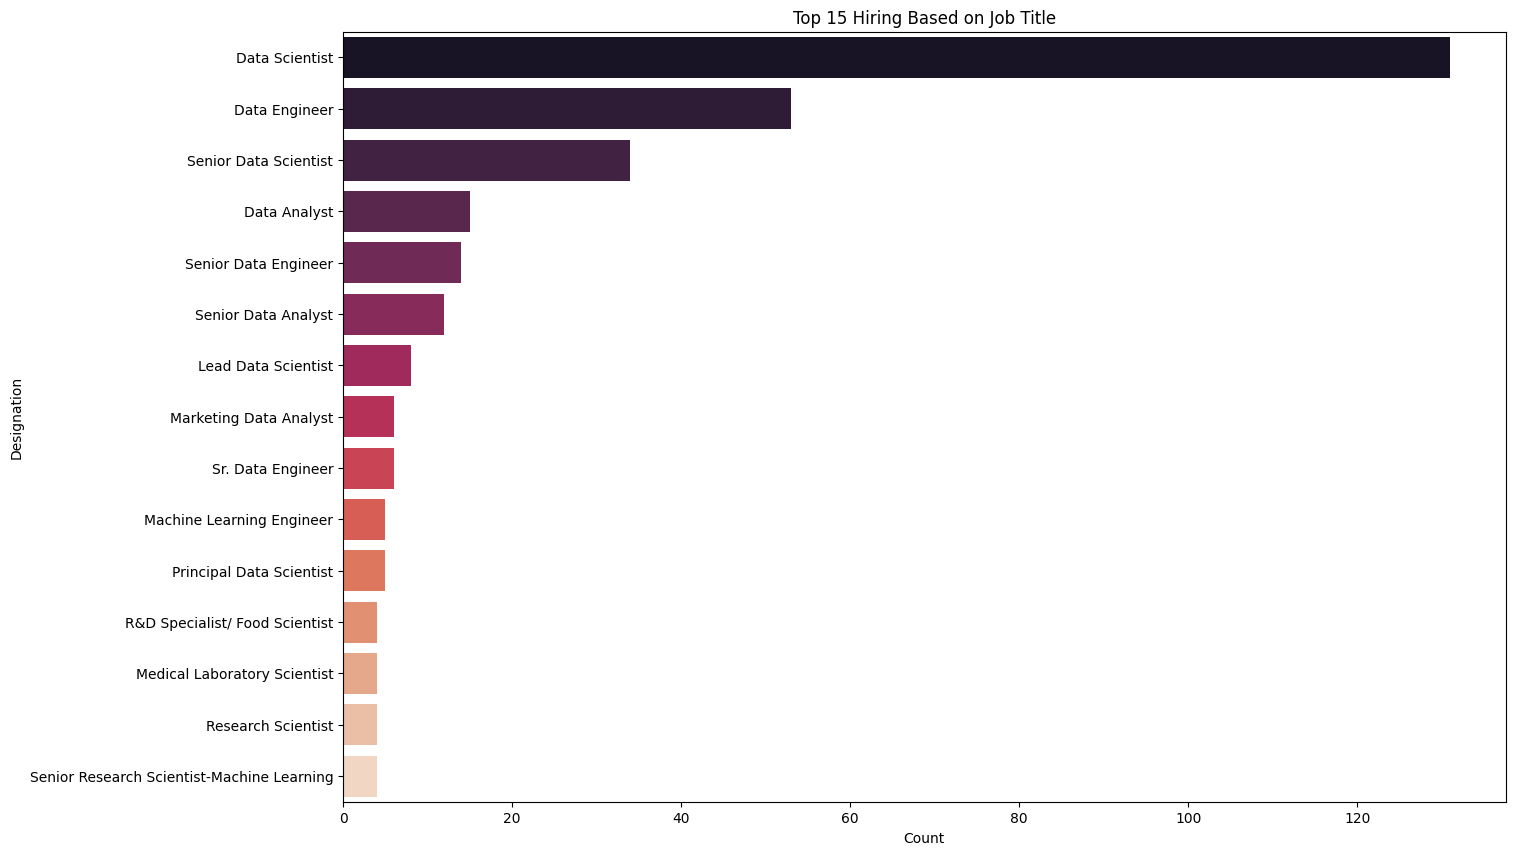

In [476]:
# Top 15 hiring based on job title

position = job_Data['Job Title'].value_counts().nlargest(15)
# print(position)
plt.figure(figsize= (15,10))
sn.barplot(x=position.values, y = position.index, palette= 'rocket')
plt.xlabel('Count')
plt.ylabel('Designation')
plt.title('Top 15 Hiring Based on Job Title')
plt.show()



C:\Users\HITESH KOTIAN\AppData\Local\Temp\ipykernel_13144\3200275216.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




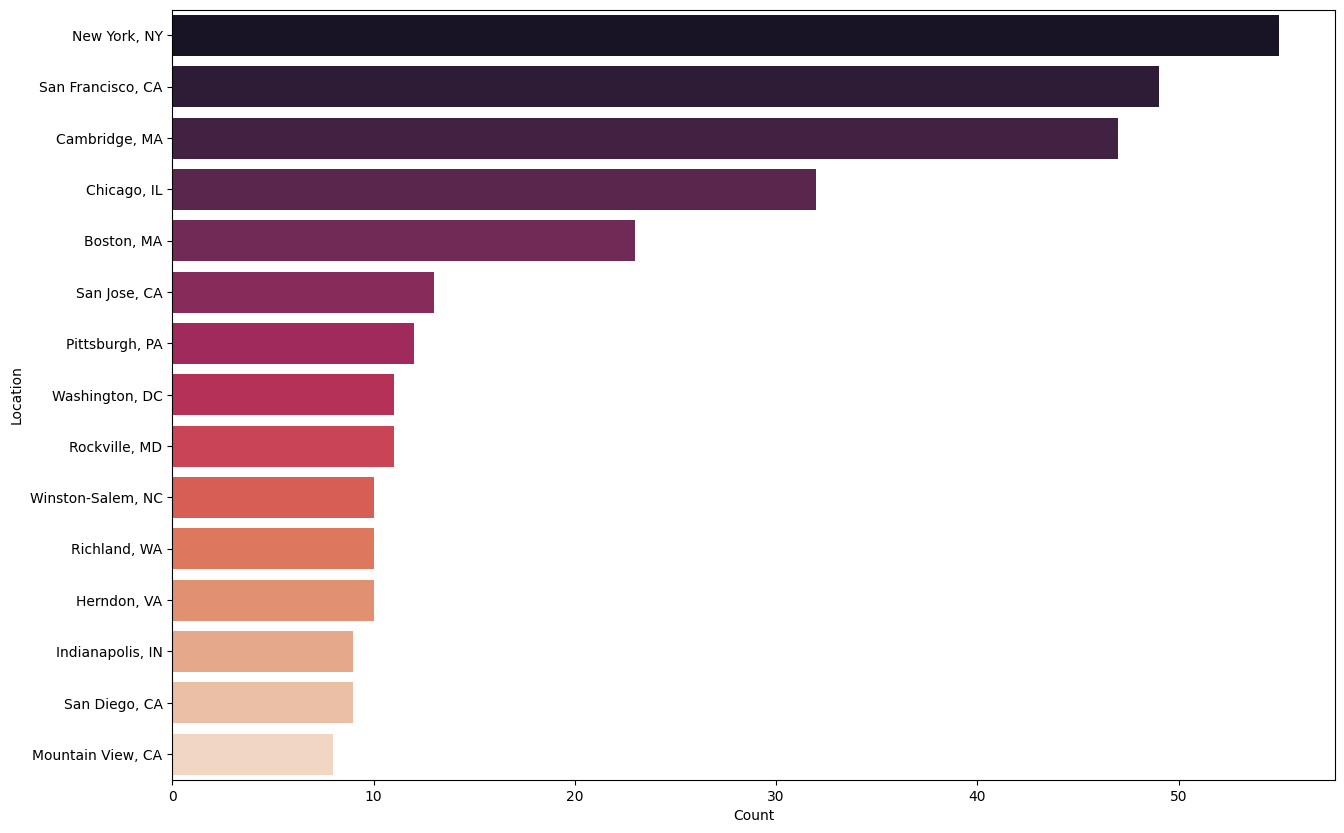

C:\Users\HITESH KOTIAN\AppData\Local\Temp\ipykernel_13144\3200275216.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




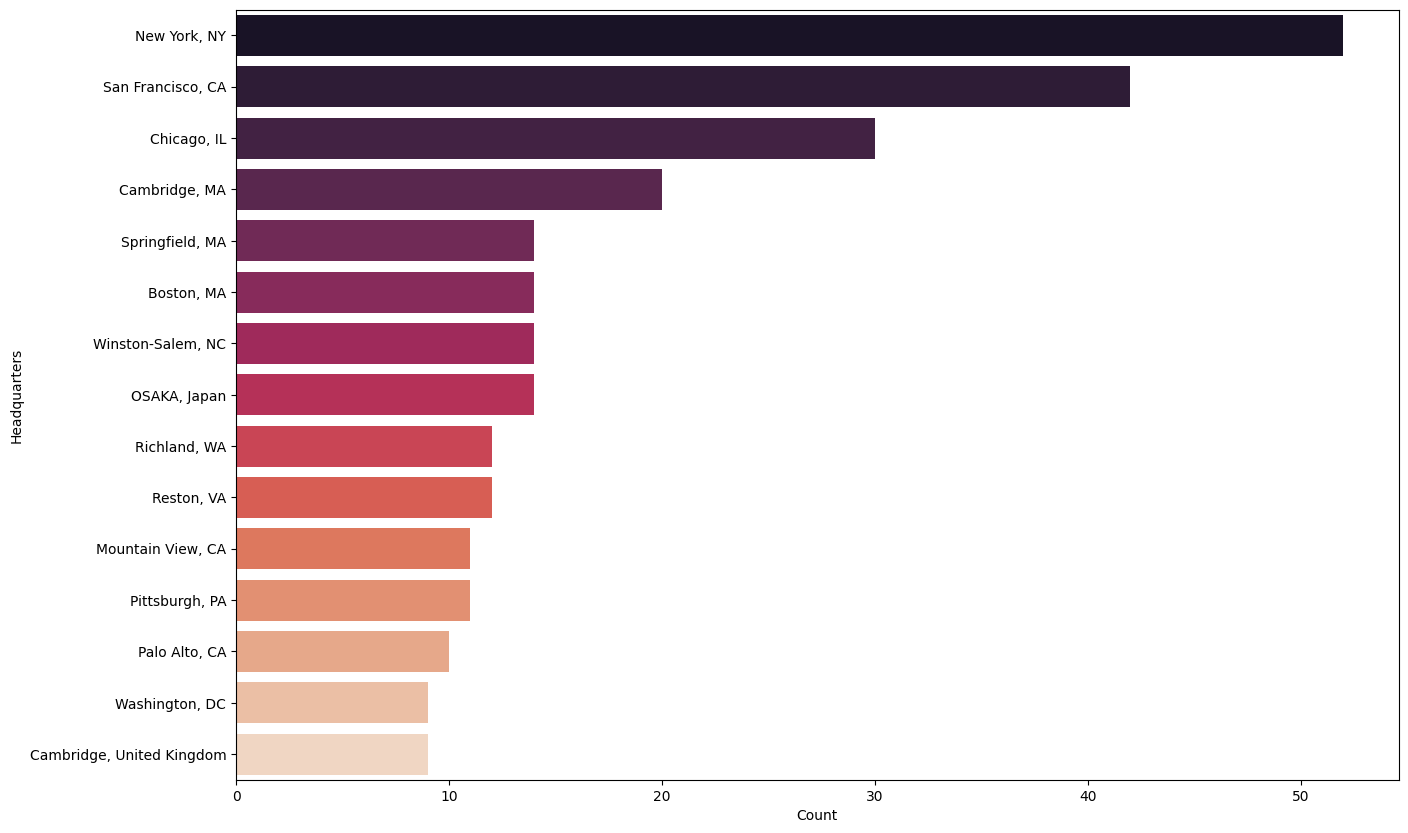

C:\Users\HITESH KOTIAN\AppData\Local\Temp\ipykernel_13144\3200275216.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




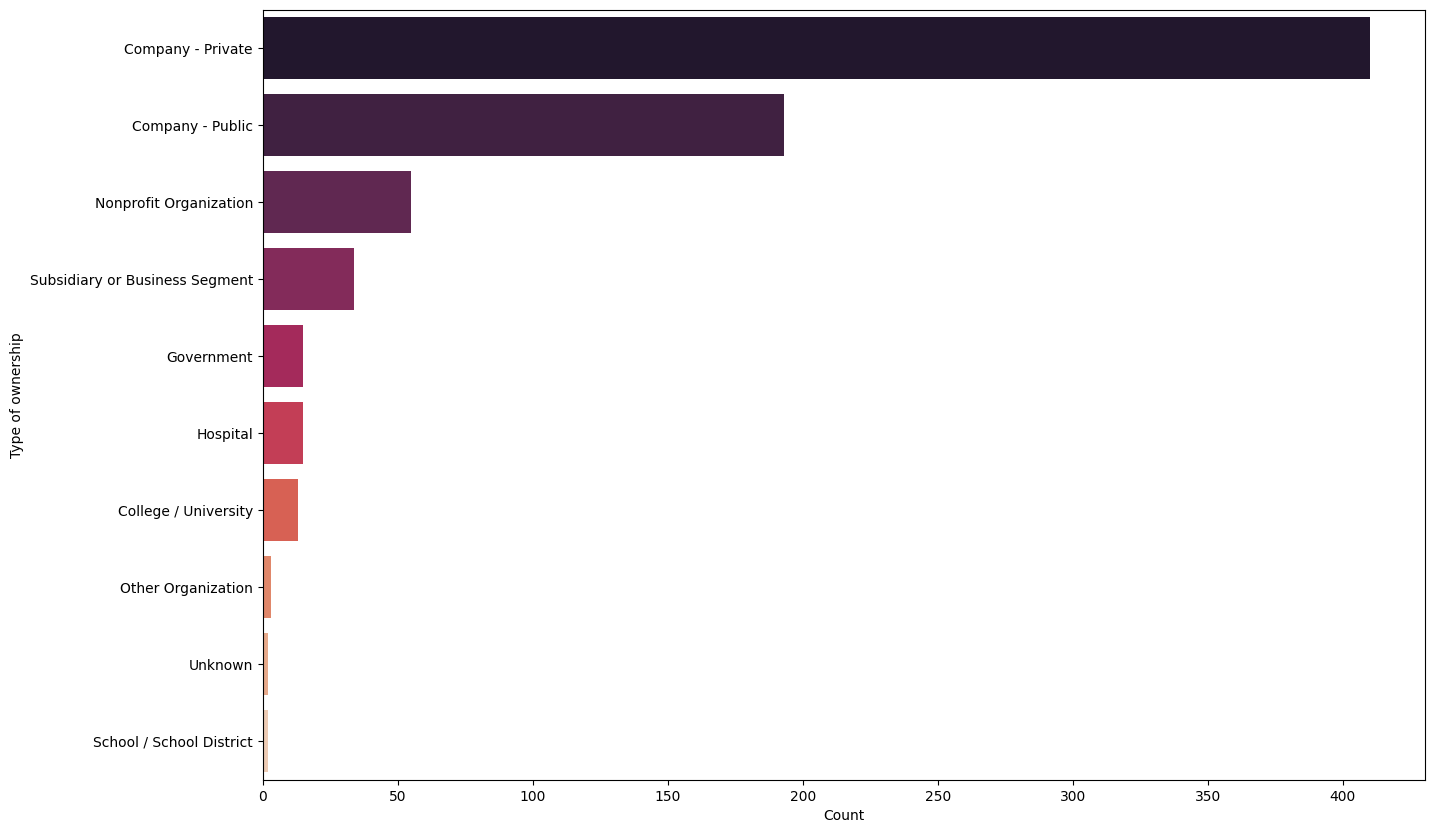

C:\Users\HITESH KOTIAN\AppData\Local\Temp\ipykernel_13144\3200275216.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




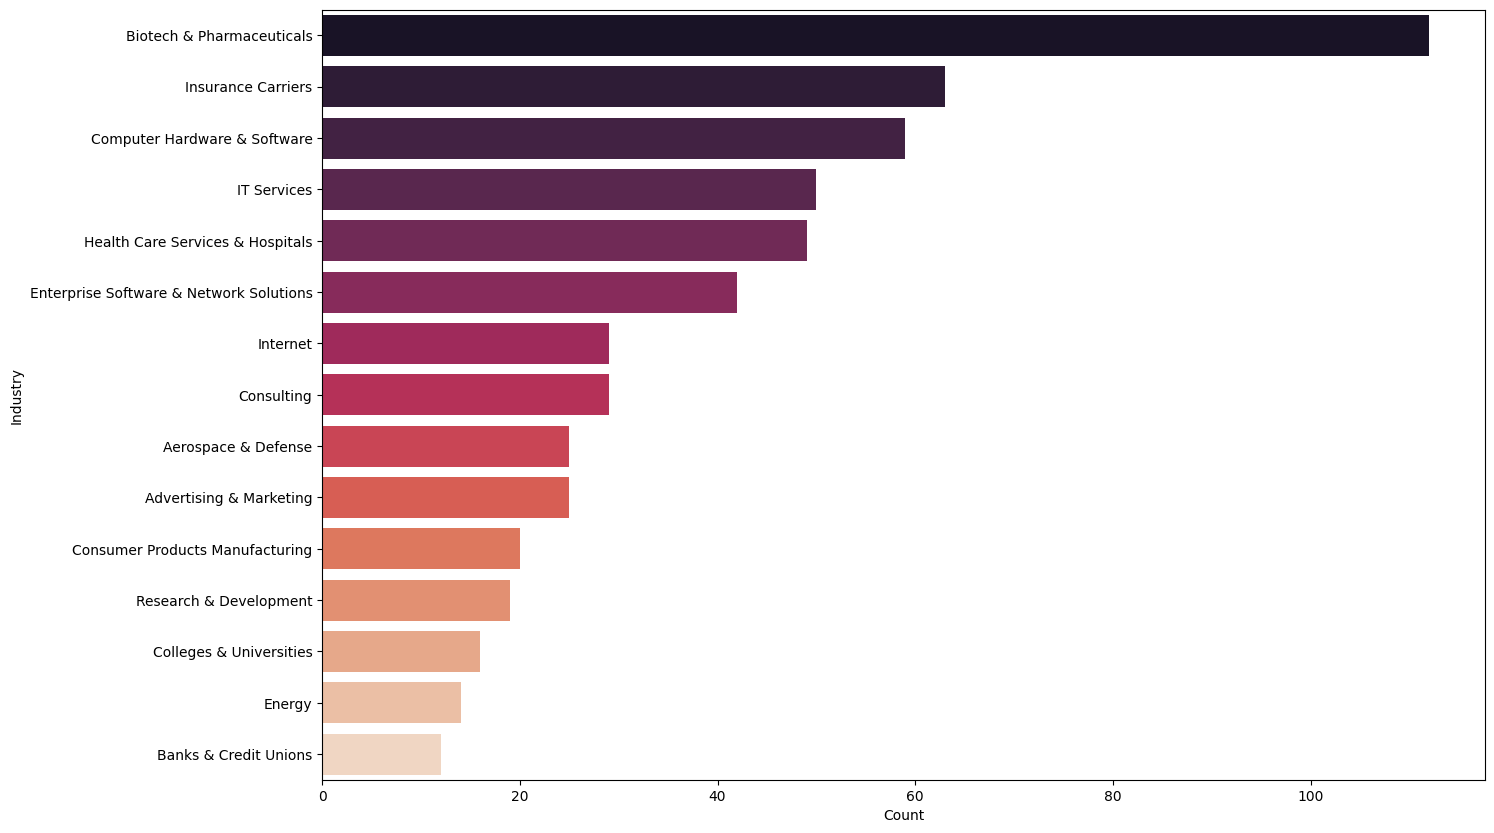

C:\Users\HITESH KOTIAN\AppData\Local\Temp\ipykernel_13144\3200275216.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




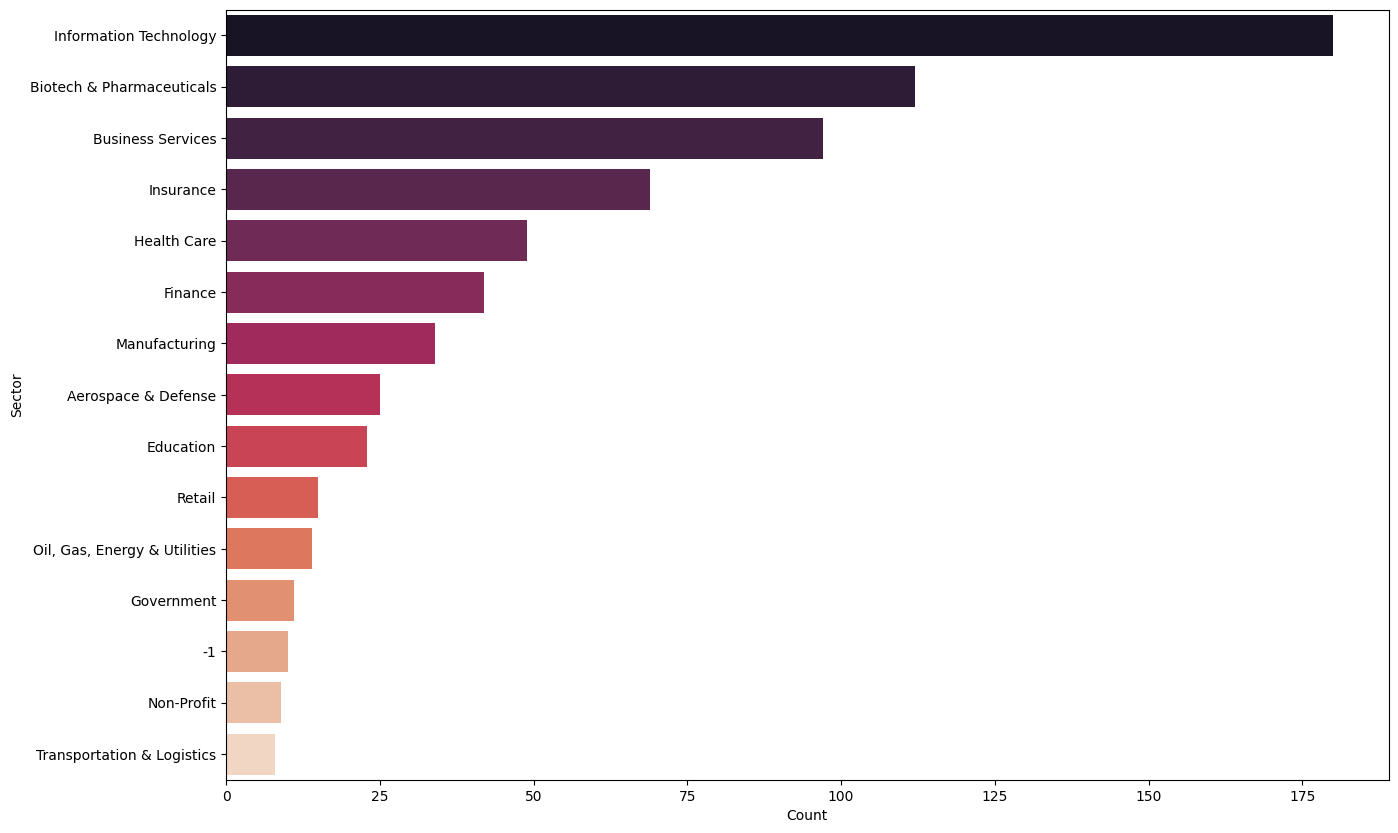

In [477]:
# Top 15 hiring based on 'Location', 'Headquarters', 'Type of ownership', 'Industry' and 'Sector'

def plot(data, column):
    column_15 = data[column].value_counts().nlargest(15)
    plt.figure(figsize= (15,10))
    sn.barplot(x = column_15.values, y = column_15.index, palette= 'rocket' )
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

column_Data = ['Location', 'Headquarters', 'Type of ownership', 'Industry', 'Sector']
for column in column_Data:
    plot(job_Data,column)


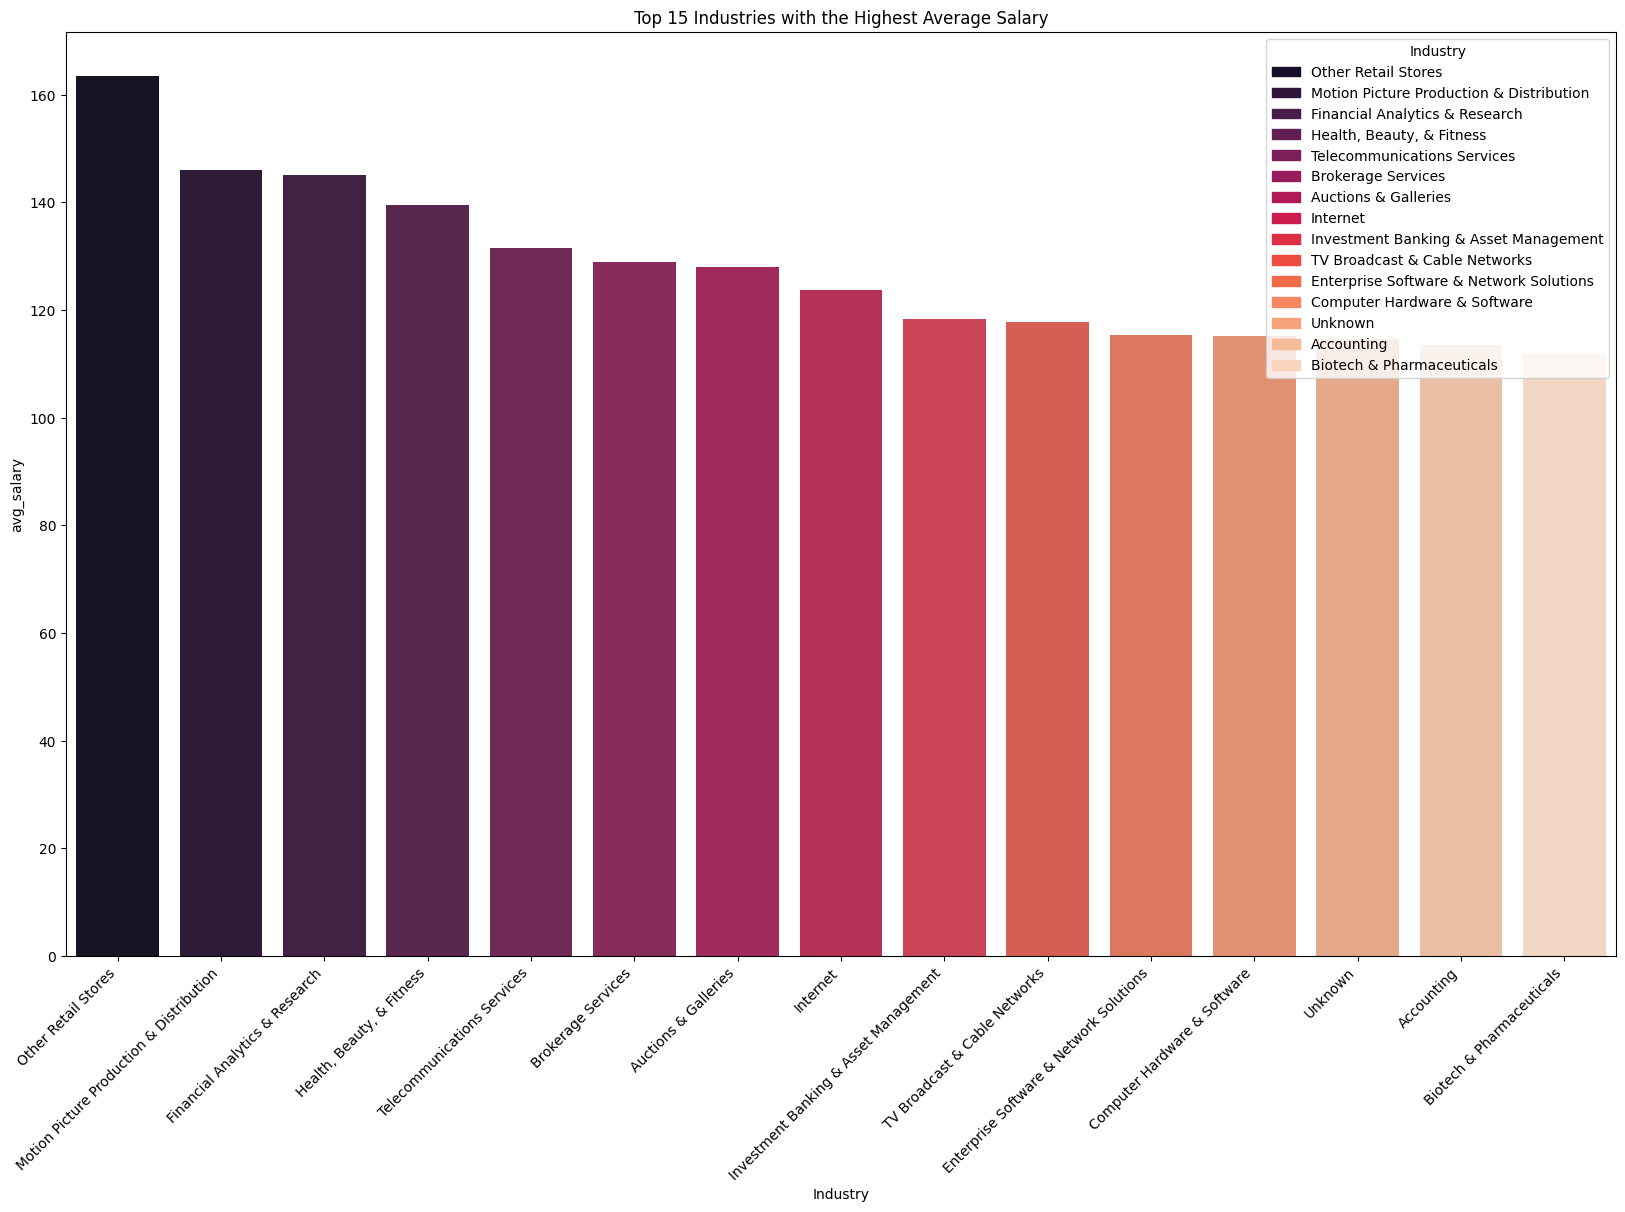

In [478]:
# Industry with the highest salary
ind_sal = pd.DataFrame(new_data.groupby(['Industry'])['avg_salary'].mean())
ind_sal_sort = ind_sal.sort_values(by ='avg_salary', ascending= False)
ind_sal_10 = ind_sal_sort.head(15)

fig,ax = plt.subplots(figsize = (20,12))

sn.barplot(x = ind_sal_10.index, y = ind_sal_10['avg_salary'], palette= 'rocket', hue = ind_sal_10.index, ax = ax, )
plt.xticks(size = 10, rotation = 45, ha = 'right')
plt.title('Top 15 Industries with the Highest Average Salary')

palette = sn.color_palette("rocket", len(ind_sal_10))
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(ind_sal_10))]
labels = ind_sal_10.index
ax.legend(handles, labels, loc='upper right', title='Industry')
plt.show()



Retail stores and Motion picture production take the highest average salary among all the industry. IT being the most popular sector and Construction being the most important for the Country's GDP doesnt make top 15 in terms of average salary. ENterprise Software, Computer tech, accounting and Biotech draws almost the same amount of salary.

C:\Users\HITESH KOTIAN\AppData\Local\Temp\ipykernel_13144\134987173.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




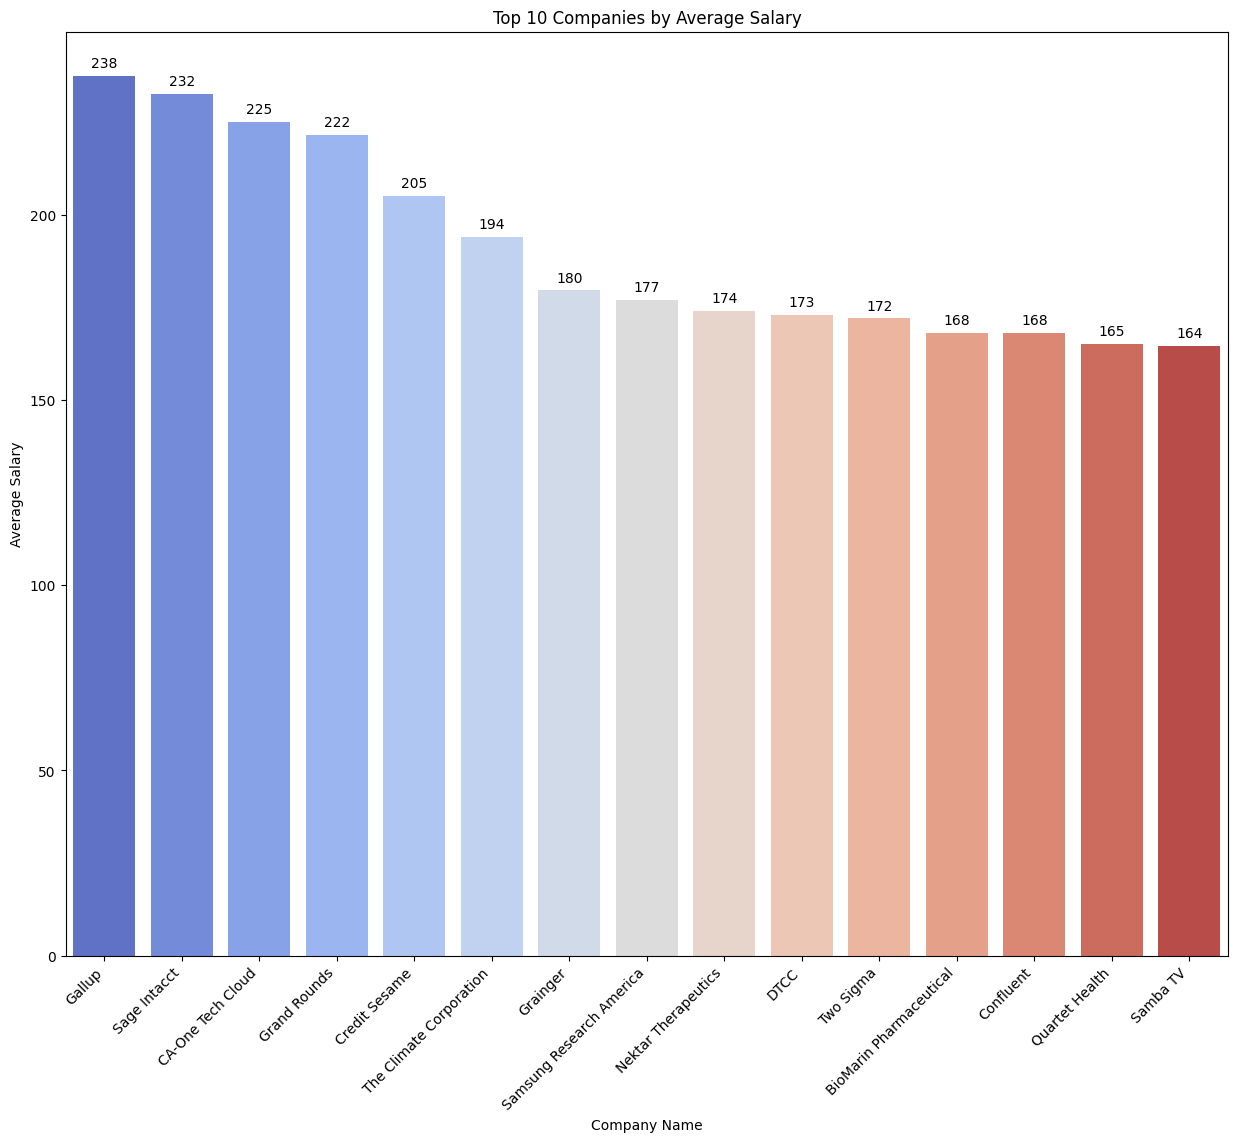

In [479]:
# Top 10 companies with highest avg salary and value on top of the bar
comp_sal = pd.DataFrame(new_data.groupby(['Company Name'])['avg_salary'].mean())
comp_sal_sort = comp_sal.sort_values(by= 'avg_salary' , ascending= False)
comp_sal_10 = comp_sal_sort.head(15)

fig, ax = plt.subplots(figsize = (15,12))
sn.barplot(x= comp_sal_10.index, y = comp_sal_10['avg_salary'] , palette= 'coolwarm', ax = ax)
for p in ax.patches:
  if p.get_height() !=0:
    ax.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
              ha = 'center', va = 'center',
              xytext = (0, 9),
              textcoords = 'offset points')
plt.ylabel('Average Salary')
plt.xticks(rotation = 45, ha ='right')
plt.title('Top 10 Companies by Average Salary')

plt.show()

Gallup and Sage Intact are the two most best paying companies while only 5 companies have the average salary more than 200, while COnfluent and BioMari Pharma have the same average salary.

In [480]:
# Different Ownership of company


own_comp = new_data['Type of ownership'].value_counts(normalize= True)*100  # To get unique terms and percentage of that

fig = pgo.Figure(pgo.Pie(values= own_comp , labels= own_comp.index) )


fig.update_layout(title = 'Different Ownership of company')
fig.update_traces(hoverinfo='label+percent', hole=0.25)



The data we have shows almost 80% of the companies are private. The job vacancy is less than 10% in combine of Government, Hospital and Universities.

In [481]:
def data(df,column):
    top_15 = df[column].value_counts().to_frame(name='number_companies').head(10)
    return top_15.style.background_gradient(cmap = 'YlOrRd')

column_Data = ['Founded', 'Headquarters', 'Type of ownership', 'Industry', 'Sector']
for column in column_Data:
    display(data(job_Data,column))

,number_companies
Founded,
no info,50
2010,32
2008,31
1996,27
2006,24
2012,21
2011,19
1958,18
2007,18


,number_companies
Headquarters,
"New York, NY",52
"San Francisco, CA",42
"Chicago, IL",30
"Cambridge, MA",20
"Springfield, MA",14
"Boston, MA",14
"Winston-Salem, NC",14
"OSAKA, Japan",14
"Richland, WA",12


,number_companies
Type of ownership,
Company - Private,410
Company - Public,193
Nonprofit Organization,55
Subsidiary or Business Segment,34
Government,15
Hospital,15
College / University,13
Other Organization,3
Unknown,2


,number_companies
Industry,
Biotech & Pharmaceuticals,112
Insurance Carriers,63
Computer Hardware & Software,59
IT Services,50
Health Care Services & Hospitals,49
Enterprise Software & Network Solutions,42
Internet,29
Consulting,29
Aerospace & Defense,25


,number_companies
Sector,
Information Technology,180
Biotech & Pharmaceuticals,112
Business Services,97
Insurance,69
Health Care,49
Finance,42
Manufacturing,34
Aerospace & Defense,25
Education,23


In [518]:
# # Company Size 
# comp_size = job_Data[['Size','Company Name']]
# comp_size_value = comp_size['Size'].value_counts()
# plt.figure(figsize= (15,10))
# fig = pgo.Figure(pgo.Funnelarea(
#     values=comp_size_value, labels= comp_size['Company Name'],title = 'Employees',customdata=comp_size_value,
#     hovertemplate=' %{customdata}<extra></extra>'))
# fig.update_layout(title_text='Company Size Distribution',funnelmode='stack')
# fig.show()

<Figure size 1500x1000 with 0 Axes>

In [533]:
program = new_data[['python_yn','R_yn','spark','aws','excel']]
# program_value = program.count()

graph = pgo.Figure(pgo.scatter(x = program.index, y = program.values ))

graph.update_layout(title = 'Count of Different Programming Skills/Technologies' )
graph.show()

TypeError: 'module' object is not callable

In [535]:
import plotly.graph_objects as go
import pandas as pd

# Sample DataFrame (replace with your actual DataFrame)
new_data = pd.DataFrame({
    'python_yn': [1, 0, 1, 1, 0, 0, 1],
    'R_yn': [0, 1, 0, 0, 1, 0, 1],
    'spark': [1, 0, 1, 1, 0, 1, 0],
    'aws': [0, 1, 0, 0, 1, 0, 1],
    'excel': [1, 1, 1, 1, 1, 1, 0]
})

# Select relevant columns
program = new_data[['python_yn', 'R_yn', 'spark', 'aws', 'excel']]

# Get the count of non-null values for each column
program_value = program.count()

# Create a scatter plot
fig = go.Figure(go.Scatter(
    x=program_value.index,  # x-axis labels (program names)
    y=program_value.values,  # y-axis values (counts)
    mode='markers+lines',  # display both markers and lines
    marker=dict(size=10)  # size of the markers
))

# Update layout
fig.update_layout(
    title='Count of Different Programming Skills/Technologies',
    xaxis_title='Program',
    yaxis_title='Count',
    showlegend=False
)

# Show the figure
fig.show()


TypeError: 'DataFrame' object is not callable